In [6]:
%cd /home/stef/bottle/
from src.utils import load_json, save_json
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices=True
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

/home/stef/bottle


In [7]:
krs = load_json("./data/mapping/known_rxns_swissprot_enzymes_240310_v2.json")

In [6]:
known_compounds = set()
for k,v in tqdm( krs.items()):
    cpds = ".".join(v['smarts'].split('>>'))
    cpds = set(cpds.split('.'))
    for c in cpds:
        known_compounds.add(c)

100%|██████████| 20382/20382 [00:00<00:00, 275718.03it/s]


In [10]:
known_mols = [Chem.MolFromSmiles(smi) for smi in known_compounds]

RDKit ERROR: [09:39:23] Can't kekulize mol.  Unkekulized atoms: 2 4 5 11
[09:39:23] Can't kekulize mol.  Unkekulized atoms: 2 4 5 11

RDKit ERROR: 
RDKit ERROR: [09:39:23] Can't kekulize mol.  Unkekulized atoms: 1 5 6 7 8 9
RDKit ERROR: 
[09:39:23] Can't kekulize mol.  Unkekulized atoms: 1 5 6 7 8 9

RDKit ERROR: [09:39:23] Can't kekulize mol.  Unkekulized atoms: 1 5 9 10
RDKit ERROR: 
[09:39:23] Can't kekulize mol.  Unkekulized atoms: 1 5 9 10

RDKit WARNING: [09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
[09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit WARNING: [09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
[09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
[09:39:23] WARNING: not removing hydrogen atom with dummy atom neighbors
RDKit ERROR: [09:39:23] Can't kekulize mol.  Unkekulized atoms: 28 

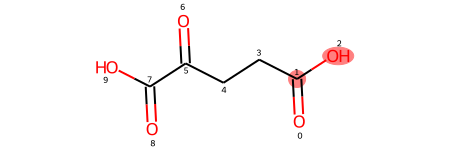

In [19]:
akg = 'O=C(O)CCC(=O)C(=O)O'
m = Chem.MolFromSmiles(akg)

# Reaction center only
m.__sssAtoms = [1, 2]
m

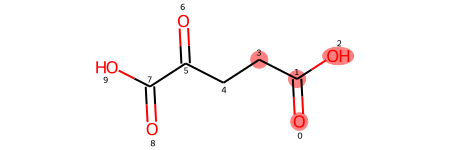

In [20]:
# R=1
m.__sssAtoms = [0, 1, 2, 3]
m

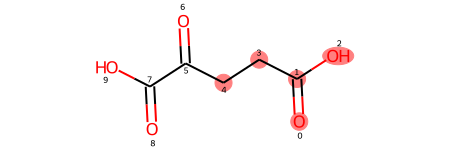

In [25]:
# R=2
m.__sssAtoms = [0, 1, 2, 3, 4]
m

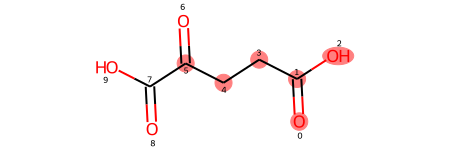

In [22]:
# R=3
m.__sssAtoms = [0, 1, 2, 3, 4, 5]
m

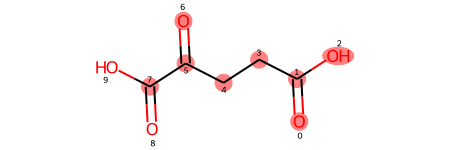

In [23]:
# R=4
m.__sssAtoms = [0, 1, 2, 3, 4, 5, 6, 7]
m

In [51]:
rc_patt = Chem.MolFromSmiles('CO')
r1_patt = Chem.MolFromSmiles('O=C(O)C')
r2_patt = Chem.MolFromSmiles('O=C(O)CC')
rinf_patt = Chem.MolFromSmiles('O=C(O)CCC(=O)C(=O)O')
# Count number of molecules matching substructs

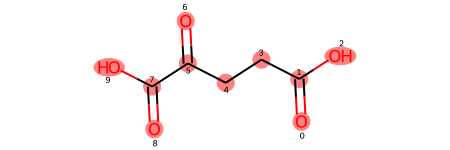

In [67]:
m.GetSubstructMatch(rinf_patt)
m

In [61]:
match_cts = []
for ss in (rc_patt, r1_patt, r2_patt, rinf_patt):
    ss_match = set() 
    for mol in known_mols:
        if mol:
            if mol.GetSubstructMatches(ss):
                ss_match.add(Chem.CanonSmiles(Chem.MolToSmiles(mol)))
        
    match_cts.append(len(ss_match))

In [62]:
match_cts

[7759, 3807, 3250, 8]

In [63]:
ss_match

{'CC(O)(CC(=O)C(=O)O)C(=O)O',
 'NC1C=CC(CC(=O)C(=O)O)(C(=O)O)C=C1',
 'O=C(O)C(=O)CC(O)C(=O)O',
 'O=C(O)C(=O)CC1(C(=O)O)C=CC(O)C=C1',
 'O=C(O)C=C(CC(=O)C(=O)O)C(=O)O',
 'O=C(O)CC(C(=O)O)C(=O)C(=O)O',
 'O=C(O)CC(O)(CC(=O)C(=O)O)C(=O)O',
 'O=C(O)CCC(=O)C(=O)O'}

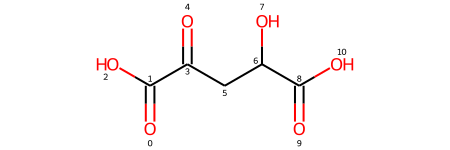

In [66]:
Chem.MolFromSmiles('O=C(O)C(=O)CC(O)C(=O)O')

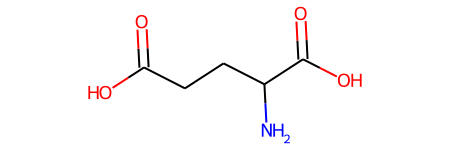

In [69]:
glutamate = 'C(CC(=O)O)C(C(=O)O)N'
IPythonConsole.drawOptions.addAtomIndices=False
Chem.MolFromSmiles(glutamate)

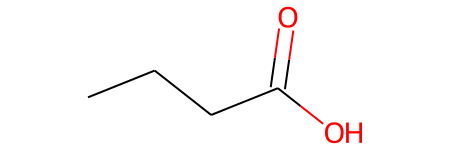

In [75]:
butyric_acid = "CCCC(O)=O"
oxobutyric_acid = "CCC(=O)C(O)=O"
benzoic_acid = "C1=CC=C(C=C1)C(=O)O"

Chem.MolFromSmiles(butyric_acid)

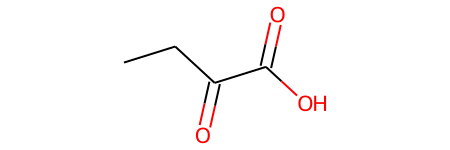

In [73]:
Chem.MolFromSmiles(oxobutyric_acid)

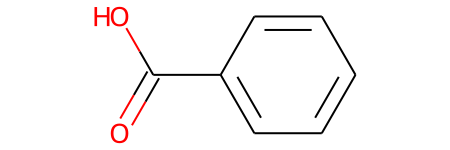

In [76]:
Chem.MolFromSmiles(benzoic_acid)

In [1]:
'''
Get representative examples from akg -> hopa 2 step to illustrate rcmcs
'''
import pickle

# Params
starters = 'alpha_ketoglutarate'
targets = 'hopa'
generations = 2
ts = 0

expansion_dir = '../data/processed_expansions/'
fn = f"{starters}_to_{targets}_gen_{generations}_tan_sample_{ts}_n_samples_1000.pkl" # Expansion file name

# Load processed expansions
with open(expansion_dir + fn, 'rb') as f:
    pe = pickle.load(f)

In [24]:
enzyme_validation_threshold = 1.0
sort_by = ['prc_mcs']
filter_by = {'mdf':0, 'enzyme_validation':enzyme_validation_threshold}
path_ids = [15, 5, 1]

paths = pe.get_paths_w_id(path_ids,
                sort_by=sort_by,
                filter_by=filter_by,
                reduce_predicted_reactions='min'
                )

In [25]:
rxn_idxs = [1, 0, 0]
paths = pe.get_paths_w_id(path_ids)
prids = []
for path, rxn_idx in zip(paths, rxn_idxs):
    prid = path.reaction_ids[rxn_idx]
    # kr_id = pe.predicted_reactions[pr_id].top_analogue()['analogue'].id
    prids.append(prid)

In [26]:
for prid in prids:
    pr = pe.predicted_reactions[prid]

[('Rd1f1855d6cf2f9ba9b455f8c5367e1cb8b0b8080f92147a903d2f7eae68a4685',
  'R7c5076ac36116c8ded06881b222819f7c575b611104d3b4ad4d4efdbe88d0e81'),
 ('R11b46ce23c6699f66f1a656140efc74fec511545745c4d09c9ef5363c6dcbe48',
  'R975a7e751f6b0a82ea3815632630a0f6ef85accf5ecfb039b7e683336084feb6'),
 ('Rb65fae4b667c959601612dad7519fdfbf5d62e465a423a197266b7abfd31edda',
  'R75de4945e18293ad0c6a855152d9856244813bac2bbc39a78db846c6184a7d93')]